In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it = train_datagen.flow_from_directory('dataset/train/', class_mode = 'categorical',
                                             batch_size= 8, target_size=(224,224))
valid_it = val_datagen.flow_from_directory('dataset/val/', class_mode = 'categorical',
                                           batch_size = 8 , target_size =(224,224))
test_it = test_datagen.flow_from_directory('dataset/test/', class_mode = 'categorical',
                                           batch_size = 8, target_size = (224,224))

Found 1317 images belonging to 5 classes.
Found 163 images belonging to 5 classes.
Found 170 images belonging to 5 classes.


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [3]:
from keras.layers import LeakyReLU
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.compat.v2.config.experimental.set_memory_growth(gpu, True)

model = Sequential()

model.add(Conv2D(64, (3,3),padding ='same',kernel_initializer= 'he_uniform',
                 name = 'block1_conv1', input_shape= (224,224,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64 , (3,3), padding = 'same', kernel_initializer= 'he_uniform',
                 name = 'block1_conv2'))
model.add(LeakyReLU(alpha=0.1))                
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), name = 'block1_pool'))

model.add(Conv2D(128,(3,3), padding = 'same', kernel_initializer= 'he_uniform',
                 name = 'block2_conv1'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(128,(3,3), padding = 'same', kernel_initializer = 'he_uniform',
                 name = 'block2_conv2'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name = 'block2_pool'))

model.add(Conv2D(256, (3,3), padding = 'same', kernel_initializer = 'he_uniform',
                 name = 'block3_conv1'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(256, (3,3), padding = 'same', kernel_initializer = 'he_uniform',
                 name = 'block3_conv2'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(256, (3,3), activation= 'relu', padding = 'same', kernel_initializer = 'he_uniform',
                 name = 'block3_conv3'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name = 'block3_pool'))

model.add(Conv2D(512, (3,3), padding = 'same', kernel_initializer = 'he_uniform',
                    name = 'block4_conv1'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(512, (3,3), padding = 'same', kernel_initializer = 'he_uniform',
                    name = 'block4_conv2'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(512, (3,3), padding = 'same', kernel_initializer = 'he_uniform',
                    name = 'block4_conv3'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name = 'block4_pool'))

model.add(Conv2D(512, (3,3), padding = 'same', kernel_initializer = 'he_uniform',
                    name = 'block5_conv1'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(512, (3,3), padding = 'same', kernel_initializer = 'he_uniform',
                    name = 'block5_conv2'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(512, (3,3), padding = 'same', kernel_initializer = 'he_uniform',
                    name = 'block5_conv3'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name = 'block5_pool'))

model.add(Flatten())
model.add(Dense(4096, kernel_initializer = 'he_uniform', name = 'fc1'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.2, name = 'dropout1'))
model.add(Dense(4096, kernel_initializer = 'he_uniform', name = 'fc2'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.1, name = 'dropout2'))
model.add(Dense(5, activation='softmax', name = 'predictions'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 64)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 224, 224, 64)      0         
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 112, 112, 128)     0

In [4]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
              

In [5]:
history = model.fit(train_it, steps_per_epoch= len(train_it),
                    validation_data= valid_it, validation_steps= len(valid_it),
                    epochs= 100 ,verbose= 1) 

Epoch 1/100
165/165 [==============================] - 35s 170ms/step - loss: 1.6555 - accuracy: 0.2817 - val_loss: 1.5377 - val_accuracy: 0.3067
Epoch 2/100
165/165 [==============================] - 26s 155ms/step - loss: 1.5344 - accuracy: 0.2938 - val_loss: 1.5359 - val_accuracy: 0.3129
Epoch 3/100
165/165 [==============================] - 26s 160ms/step - loss: 1.5321 - accuracy: 0.3113 - val_loss: 1.5202 - val_accuracy: 0.3129
Epoch 4/100
165/165 [==============================] - 27s 163ms/step - loss: 1.5256 - accuracy: 0.3121 - val_loss: 1.5281 - val_accuracy: 0.3129
Epoch 5/100
165/165 [==============================] - 27s 165ms/step - loss: 1.5261 - accuracy: 0.3113 - val_loss: 1.5194 - val_accuracy: 0.3006
Epoch 6/100
165/165 [==============================] - 27s 166ms/step - loss: 1.5197 - accuracy: 0.3250 - val_loss: 1.5125 - val_accuracy: 0.3436
Epoch 7/100
165/165 [==============================] - 28s 166ms/step - loss: 1.5130 - accuracy: 0.3181 - val_loss: 1.5106 -

In [6]:
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

C:\Users\User\AppData\Local\Temp\ipykernel_1388\4195207560.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)


22/22 [==============================] - 2s 77ms/step - loss: 1.2813 - accuracy: 0.6176
> 61.765


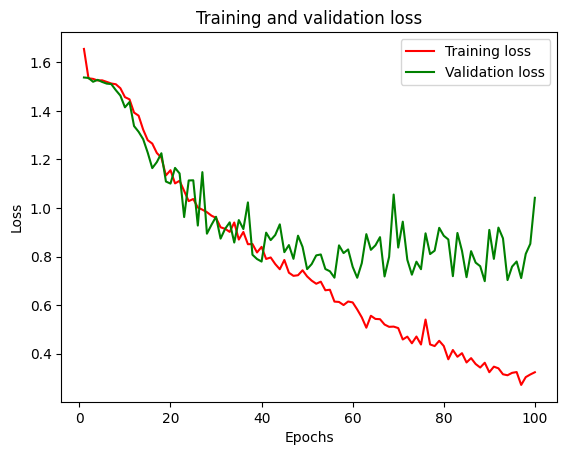

In [7]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

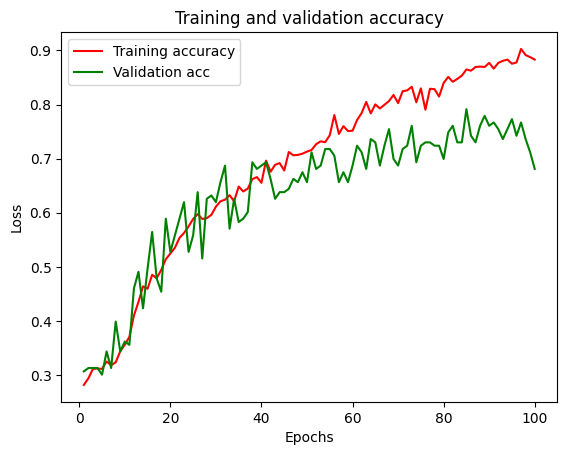

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training accuracy')

plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()